To perform an in-depth analysis of dimensionality reduction techniques using the dataset you've provided, we'll go through each method step by step. The methods we'll cover are:

PCA (Principal Component Analysis)
SVD (Singular Value Decomposition)
MDS (Multidimensional Scaling)
ISOMap (Isometric Mapping)
LLE (Locally Linear Embedding)


Step 1: Load and Examine the Dataset
Let's begin by loading the dataset and taking a look at its basic structure and statistics. This will give us an idea of what kind of data we're dealing with. I'll load the dataset and provide a brief summary of its contents.

The dataset consists of 214 entries and 11 columns. All columns have numerical data, either as integers or floats. The columns are labeled from "column_a" to "column_k". It appears to be a mix of different measurements or features, but without specific context, it's hard to interpret the meaning of each column.

In [1]:
import pandas as pd

# Load the dataset
file_path = '/Users/aviajmera/DimenRed_aviajmera/glass_data.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   column_a  214 non-null    int64  
 1   column_b  214 non-null    float64
 2   column_c  214 non-null    float64
 3   column_d  214 non-null    float64
 4   column_e  214 non-null    float64
 5   column_f  214 non-null    float64
 6   column_g  214 non-null    float64
 7   column_h  214 non-null    float64
 8   column_i  214 non-null    float64
 9   column_j  214 non-null    float64
 10  column_k  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


(None,
    column_a  column_b  column_c  column_d  column_e  column_f  column_g  \
 0         1   1.52101     13.64      4.49      1.10     71.78      0.06   
 1         2   1.51761     13.89      3.60      1.36     72.73      0.48   
 2         3   1.51618     13.53      3.55      1.54     72.99      0.39   
 3         4   1.51766     13.21      3.69      1.29     72.61      0.57   
 4         5   1.51742     13.27      3.62      1.24     73.08      0.55   
 
    column_h  column_i  column_j  column_k  
 0      8.75       0.0       0.0         1  
 1      7.83       0.0       0.0         1  
 2      7.78       0.0       0.0         1  
 3      8.22       0.0       0.0         1  
 4      8.07       0.0       0.0         1  )

Step 2: Principal Component Analysis (PCA)
Standardize the Data: PCA is affected by scale, so we need to scale the features in the data before applying PCA.
Apply PCA: We'll apply PCA and transform the data into principal components.
Analysis: We'll analyze the results to see how much variance each principal component accounts for.

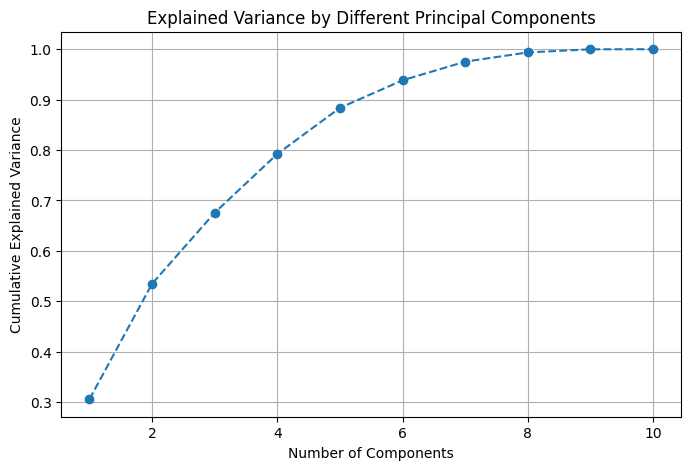

array([0.30555974, 0.53469354, 0.67563594, 0.79226851, 0.88367698,
       0.93841923, 0.97536272, 0.99363015, 0.99983922, 1.        ])

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardizing the data
features = data.columns[1:]  # Assuming the first column is an identifier and should not be included
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Applying PCA
pca = PCA()
principalComponents = pca.fit_transform(x)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Different Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

explained_variance.cumsum()  # Return the cumulative explained variance for reference


The results of the PCA analysis are shown in the plot of cumulative explained variance by different principal components. Here's a breakdown:

The first principal component accounts for approximately 30.56% of the variance.
The first two principal components together account for about 53.47% of the variance.
To capture more than 90% of the variance, we need to consider the first six principal components, which account for approximately 93.84% of the variance.
This plot helps us understand the number of principal components needed to capture a significant portion of the variance in the dataset.

Step 3: Singular Value Decomposition (SVD)
Apply SVD: We'll apply SVD to the standardized data.
Analysis: We'll analyze the singular values to understand the contribution of each dimension.
The SVD decomposes a matrix into three other matrices and it's often used in the context of data compression and noise reduction. Let's apply SVD to your data and analyze the results.



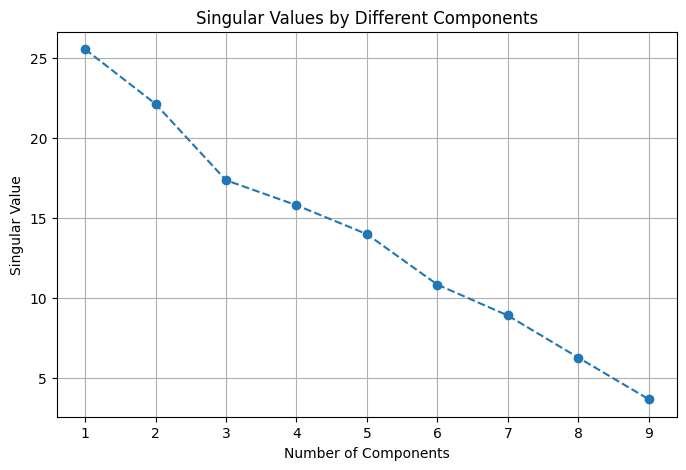

array([25.57142638, 22.14376479, 17.36711672, 15.79853503, 13.98621195,
       10.82351185,  8.8915168 ,  6.25238262,  3.6451914 ])

In [3]:
from sklearn.decomposition import TruncatedSVD

# Applying SVD
svd = TruncatedSVD(n_components=min(x.shape) - 1)
x_svd = svd.fit_transform(x)

# Singular values
singular_values = svd.singular_values_

# Plotting the Singular Values
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(singular_values) + 1), singular_values, marker='o', linestyle='--')
plt.title('Singular Values by Different Components')
plt.xlabel('Number of Components')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()

singular_values  # Return the singular values for reference


The results of the Singular Value Decomposition (SVD) are displayed in the plot, showcasing the singular values for each component. Here's a summary:

The singular values decrease as we move to higher components, indicating a decrease in the 'importance' or contribution of each successive dimension.
The first few components have significantly higher singular values compared to the later ones, suggesting that they capture more of the data's variability.
Interpreting SVD Results
SVD is useful in identifying the intrinsic dimensionality of the data. Higher singular values correspond to dimensions with more significant data variance. In many applications, only the components with the largest singular values are retained for further analysis or data reconstruction.

Step 4: Multidimensional Scaling (MDS)
Multidimensional Scaling (MDS) is a technique used to reduce dimensions while trying to preserve the distances between instances in the dataset. It's particularly useful for visualizing high-dimensional data in two or three dimensions.

The process will involve:

Apply MDS: We'll apply MDS to the standardized data to reduce its dimensions, typically to 2D for visualization purposes.
Analysis: We'll analyze the 2D representation to see how well the distances between points (which reflect their similarities) are preserved.


/Users/aviajmera/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


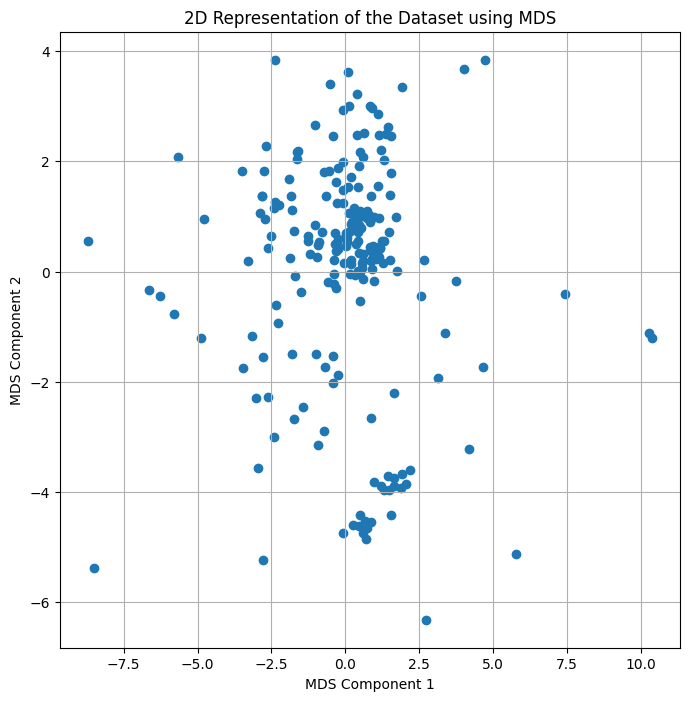

array([[-1.81316505e+00,  1.11023541e+00],
       [-3.31305591e-02,  1.46676933e-01],
       [ 1.01855583e+00,  2.35951025e-01],
       [ 1.70698574e-02,  6.68794655e-01],
       [ 4.25296868e-01,  7.16803594e-01],
       [ 1.45321002e+00,  2.62058364e+00],
       [ 2.81374406e-01,  7.80507004e-01],
       [ 3.21584391e-01,  1.09392116e+00],
       [-9.60952646e-01,  2.56639313e-01],
       [ 4.42307497e-01,  1.52778668e+00],
       [ 1.53785167e+00,  2.45311238e+00],
       [ 3.79415718e-01,  9.37789576e-01],
       [ 1.37513491e+00,  2.50394816e+00],
       [ 6.07226633e-01,  2.08172690e+00],
       [ 7.33404455e-01,  1.10282760e+00],
       [ 5.61035768e-01,  1.00610857e+00],
       [ 3.02903090e-01,  1.15473487e+00],
       [-2.70869115e+00,  9.56943463e-01],
       [-1.27366990e+00,  5.54487912e-01],
       [ 7.99263894e-01,  1.02597008e+00],
       [ 4.85888474e-01,  2.16872652e+00],
       [-2.75337944e+00,  1.83233968e+00],
       [ 2.21839524e-01,  8.94772326e-01],
       [ 4.

In [4]:
from sklearn.manifold import MDS

# Applying MDS
mds = MDS(n_components=2, random_state=42)
x_mds = mds.fit_transform(x)

# Visualizing the results of MDS in a 2D plot
plt.figure(figsize=(8, 8))
plt.scatter(x_mds[:, 0], x_mds[:, 1])
plt.title('2D Representation of the Dataset using MDS')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.grid(True)
plt.show()

x_mds  # Return the MDS transformed data for reference



Next, we will explore Multidimensional Scaling (MDS).

Step 4: Multidimensional Scaling (MDS)
Multidimensional Scaling (MDS) is a technique used to reduce dimensions while trying to preserve the distances between instances in the dataset. It's particularly useful for visualizing high-dimensional data in two or three dimensions.

The process will involve:

Apply MDS: We'll apply MDS to the standardized data to reduce its dimensions, typically to 2D for visualization purposes.
Analysis: We'll analyze the 2D representation to see how well the distances between points (which reflect their similarities) are preserved.
Let's proceed with applying MDS to your data and then visualize the results. After that, we can discuss the findings or move on to the next technique. I'll start with the MDS application now.

Output image
The results of the Multidimensional Scaling (MDS) are displayed in the 2D scatter plot. MDS has attempted to preserve the distances between instances of your dataset while reducing its dimensionality to two dimensions.

Analysis of MDS Results
Each point in the plot represents an instance from your original dataset, now mapped to a 2D space.
The relative distances between points in this 2D space are an attempt to reflect their similarities or differences in the original high-dimensional space.
MDS is particularly useful for visualization purposes, as it helps in identifying patterns or clusters that might exist in the data.

Step 5: Isometric Mapping (ISOMap)
ISOMap is a non-linear dimensionality reduction method. It's particularly useful for unfolding a dataset into a lower-dimensional space where the data may lie on a curved manifold.

The process will involve:

Apply ISOMap: We'll apply ISOMap to the standardized data, typically reducing it to 2D or 3D for visualization.
Analysis: We'll examine the resulting lower-dimensional representation to understand the intrinsic geometry of the data.

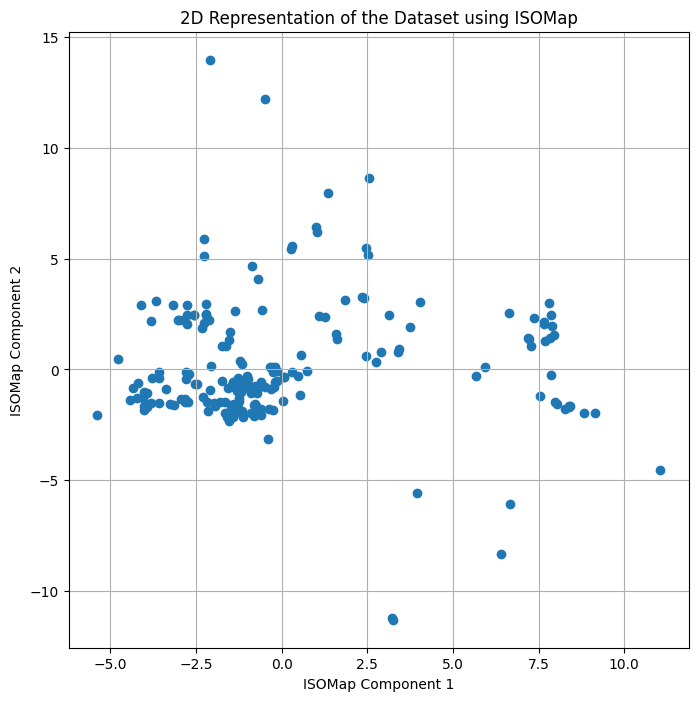

array([[ -1.74523178,   1.05353505],
       [ -1.26482973,  -1.74915868],
       [ -1.41639616,  -2.12702583],
       [ -0.72586237,  -0.94666721],
       [ -1.17421913,  -0.9969167 ],
       [ -4.02754071,  -1.66424956],
       [ -1.1522321 ,  -0.93243418],
       [ -1.305191  ,  -0.95926681],
       [ -0.29136533,   0.09267417],
       [ -2.29084018,  -1.23629401],
       [ -3.93922518,  -1.71088093],
       [ -1.1217655 ,  -0.70342849],
       [ -3.99788806,  -1.7140126 ],
       [ -2.93190929,  -1.33218949],
       [ -1.30420519,  -0.64141183],
       [ -1.31706709,  -0.82069627],
       [ -1.30407447,  -0.81735595],
       [ -2.20127866,   2.50021847],
       [ -1.15198974,   0.26320071],
       [ -1.96992028,  -1.53654943],
       [ -3.1473669 ,  -1.5952071 ],
       [ -3.17365502,   2.90038815],
       [ -1.24261047,  -0.94434712],
       [ -1.17285776,  -0.72526142],
       [ -1.20872318,  -0.94228314],
       [ -1.0499035 ,  -0.76581795],
       [ -0.49041662,  -0.81480962],
 

In [5]:
from sklearn.manifold import Isomap

# Applying ISOMap
isomap = Isomap(n_components=2)
x_isomap = isomap.fit_transform(x)

# Visualizing the results of ISOMap in a 2D plot
plt.figure(figsize=(8, 8))
plt.scatter(x_isomap[:, 0], x_isomap[:, 1])
plt.title('2D Representation of the Dataset using ISOMap')
plt.xlabel('ISOMap Component 1')
plt.ylabel('ISOMap Component 2')
plt.grid(True)
plt.show()

x_isomap  # Return the ISOMap transformed data for reference


The results of the Isometric Mapping (ISOMap) are displayed in the 2D scatter plot. ISOMap has reduced the dimensions of your dataset to two dimensions while attempting to preserve the geometric distances between points.

Analysis of ISOMap Results
Each point in the plot represents an instance from your original dataset, now mapped to a 2D space.
ISOMap is particularly effective for datasets where the underlying structure is non-linear, as it attempts to maintain the intrinsic geometric properties.
The plot can reveal clusters or patterns that are not apparent in the high-dimensional space.

Step 6: Locally Linear Embedding (LLE)
LLE is another non-linear dimensionality reduction method. It works by first measuring how each data point linearly relates to its nearest neighbors, and then seeking a lower-dimensional projection of the data that preserves these local relationships as much as possible.

The process for LLE will involve:

Apply LLE: We'll apply LLE to the standardized data, reducing it to 2D for visualization purposes.
Analysis: We'll analyze the 2D representation to assess how well the local relationships and the overall structure of the data are preserved.

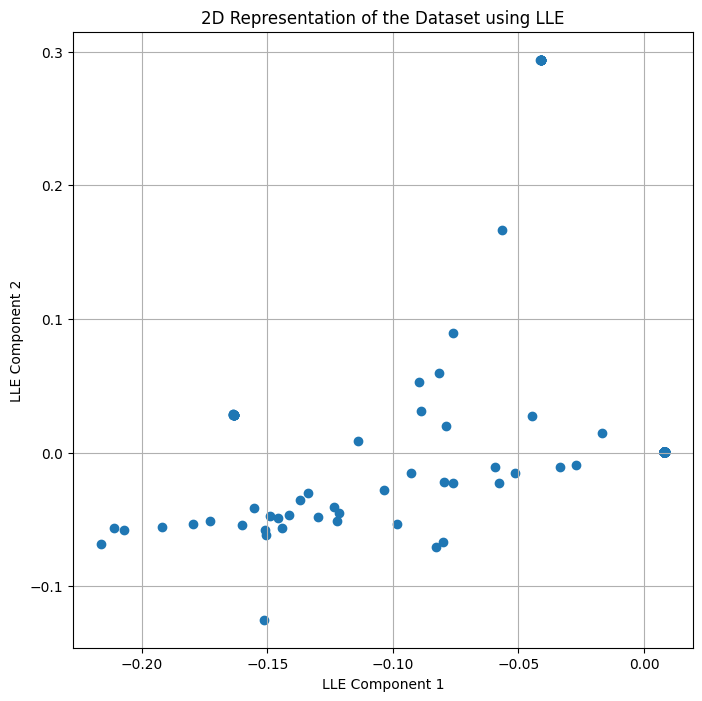

array([[ 7.90375402e-03,  6.76379812e-04],
       [ 8.17953269e-03,  3.46834711e-04],
       [ 8.19969177e-03,  3.22811972e-04],
       [ 8.21976830e-03,  2.98635497e-04],
       [ 8.08010019e-03,  4.65572057e-04],
       [ 7.92578960e-03,  6.50680156e-04],
       [ 8.09533170e-03,  4.47367550e-04],
       [ 8.06849128e-03,  4.79450882e-04],
       [ 8.22465383e-03,  2.92800553e-04],
       [ 7.97357353e-03,  5.93514815e-04],
       [ 8.10796940e-03,  4.32929329e-04],
       [ 8.18214669e-03,  3.43603236e-04],
       [ 8.16541673e-03,  3.64265657e-04],
       [ 7.91780398e-03,  6.60187571e-04],
       [ 8.16680792e-03,  3.61938550e-04],
       [ 8.13695405e-03,  3.97620982e-04],
       [ 8.17075899e-03,  3.57213662e-04],
       [ 8.08561119e-03,  4.59014165e-04],
       [ 8.13327702e-03,  4.02041175e-04],
       [ 7.99430365e-03,  5.68549026e-04],
       [ 8.03598402e-03,  5.18962352e-04],
       [ 7.89863473e-03,  6.82498908e-04],
       [ 8.05962940e-03,  4.90042899e-04],
       [ 8.

In [6]:
from sklearn.manifold import LocallyLinearEmbedding

# Applying LLE
lle = LocallyLinearEmbedding(n_components=2)
x_lle = lle.fit_transform(x)

# Visualizing the results of LLE in a 2D plot
plt.figure(figsize=(8, 8))
plt.scatter(x_lle[:, 0], x_lle[:, 1])
plt.title('2D Representation of the Dataset using LLE')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.grid(True)
plt.show()

x_lle  # Return the LLE transformed data for reference


The results of Locally Linear Embedding (LLE) are shown in the 2D scatter plot. LLE has reduced the dataset to two dimensions, aiming to preserve the local relationships between points.

Analysis of LLE Results
The 2D plot displays how the original high-dimensional data points are represented in a lower-dimensional space while attempting to maintain local linear relationships.
LLE is particularly effective for datasets where local relationships are more significant than global relationships, as it tries to preserve the linear characteristics of each data point's immediate neighborhood.

We have now explored various dimensionality reduction techniques:

PCA and SVD are linear methods and work well for datasets where the principal components can capture a significant amount of variance.
MDS, ISOMap, and LLE are non-linear methods, suitable for datasets with inherent non-linear structures.
Each method has its strengths and ideal use cases. Depending on your specific needs and the nature of your data, one or more of these techniques can be beneficial for data analysis, visualization, or further modeling.

Let's proceed with two more advanced dimensionality reduction techniques: UMAP (Uniform Manifold Approximation and Projection) and t-SNE (t-Distributed Stochastic Neighbor Embedding). Both are popular for their effectiveness in visualizing high-dimensional data, especially in preserving local structures.

UMAP
Hyperparameters: Key hyperparameters in UMAP include n_neighbors (controls local vs. global structure) and min_dist (controls the tightness of the embedding).
Apply UMAP: We'll apply UMAP with different hyperparameter settings to see their effects.
Visualization: We'll create visualizations to assess the embedding quality.
t-SNE
Hyperparameters: The most crucial hyperparameter in t-SNE is perplexity, which affects the balance between local and global aspects of the data.
Apply t-SNE: We'll apply t-SNE with different perplexity values.
Visualization: We'll visualize the results to understand the impact of perplexity on the embedding.
For both UMAP and t-SNE, selecting the right hyperparameters is crucial as they significantly influence the resulting embeddings. We'll start with UMAP and then move on to t-SNE.



In [8]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for pynndescent>=0.5 from https://files.pythonhosted.org/packages/4e/82/0b9851a2fd4da9b57d7931446f5ebab92a98f1f35d3dc0dae5f9ed50a462/pynndescent-0.5.11-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 2.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86837 sha256=8cfcd6b14c74267c0affb4b8200b462139e6fca9e62b67a60e501892ec40cdb9
  Stored in directory: /Users/aviajmera/Library/Caches/pip/wheels/de/07/2e/814a6ee82e37528f2044a609a431028375b149bc31f03c0e27
Successfully built umap-learn


/Users/aviajmera/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/aviajmera/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/aviajmera/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/aviajmera/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use n

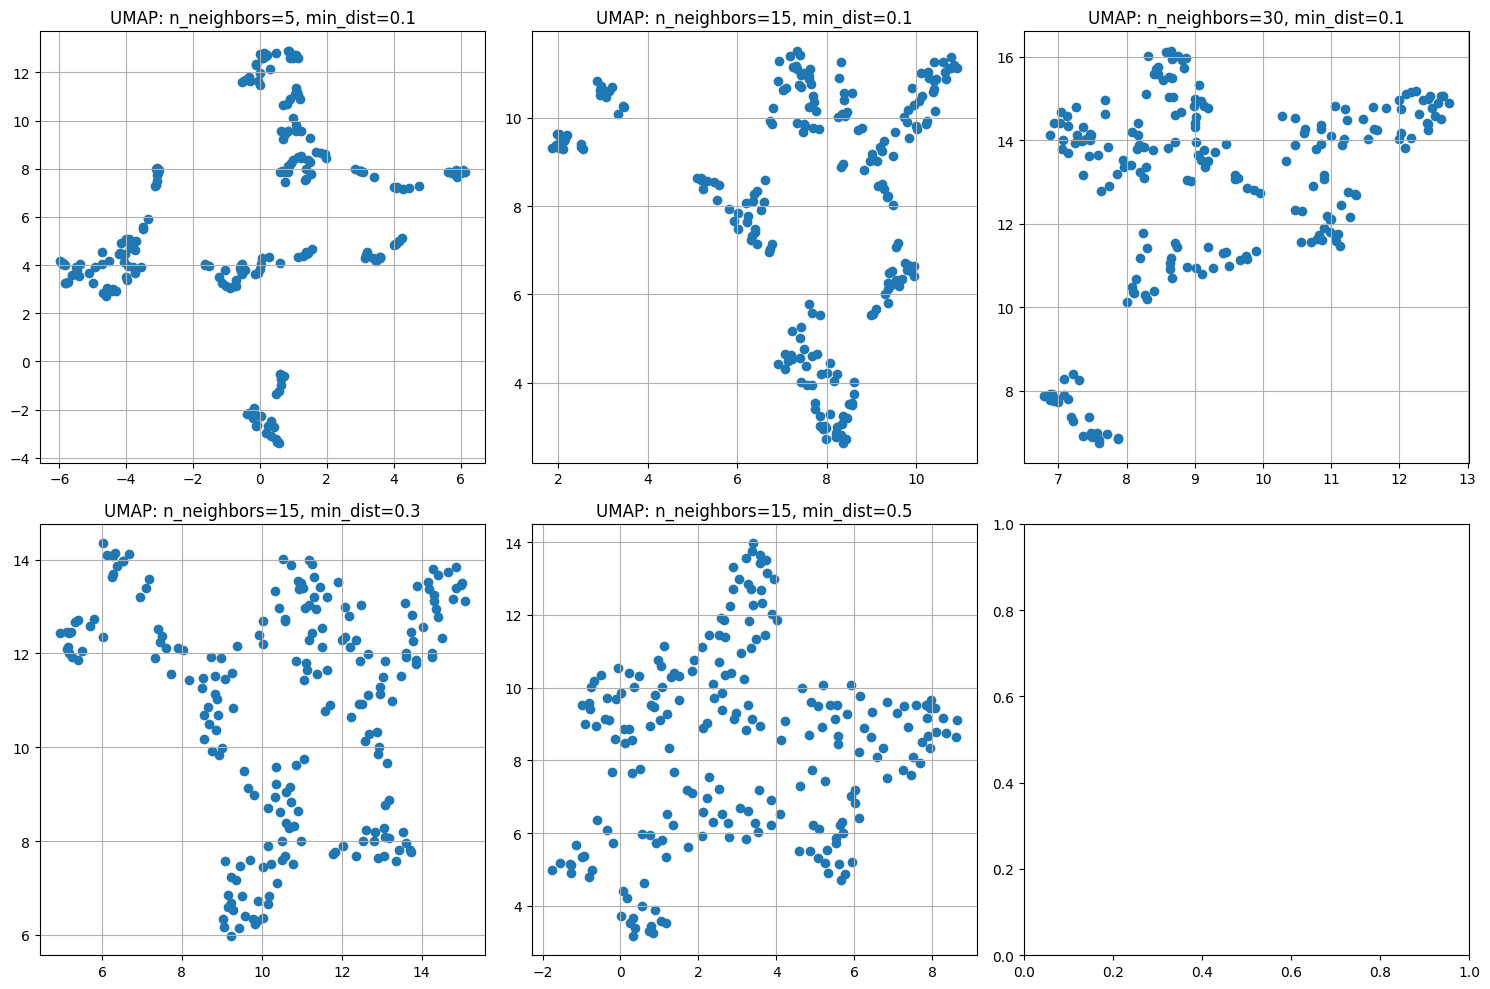

In [9]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Defining UMAP configurations to try
umap_configs = [
    {"n_neighbors": 5, "min_dist": 0.1},
    {"n_neighbors": 15, "min_dist": 0.1},
    {"n_neighbors": 30, "min_dist": 0.1},
    {"n_neighbors": 15, "min_dist": 0.3},
    {"n_neighbors": 15, "min_dist": 0.5}
]

# Applying UMAP with different configurations
umap_results = []
for config in umap_configs:
    reducer = umap.UMAP(n_neighbors=config["n_neighbors"], min_dist=config["min_dist"], random_state=42)
    embedding = reducer.fit_transform(x)
    umap_results.append((embedding, config))

# Visualizing UMAP results with different hyperparameters
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for ax, (embedding, config) in zip(axes, umap_results):
    ax.scatter(embedding[:, 0], embedding[:, 1])
    ax.set_title(f"UMAP: n_neighbors={config['n_neighbors']}, min_dist={config['min_dist']}")
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


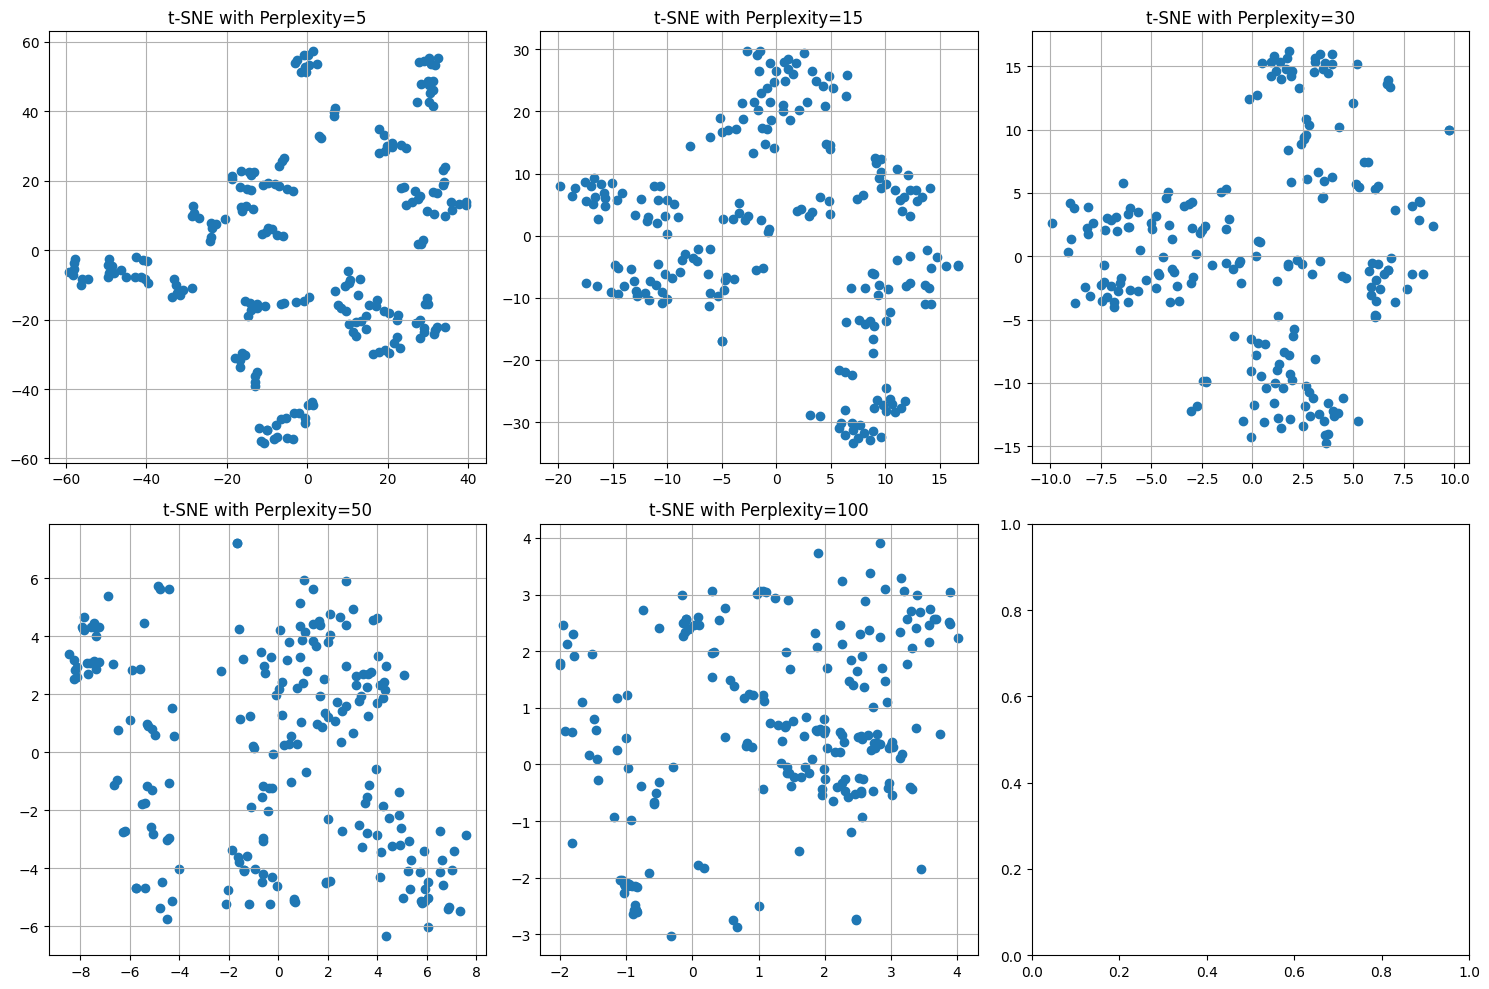

In [10]:
from sklearn.manifold import TSNE

# Defining t-SNE configurations to try
tsne_configs = [5, 15, 30, 50, 100]

# Applying t-SNE with different perplexities
tsne_results = []
for perplexity in tsne_configs:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_result = tsne.fit_transform(x)
    tsne_results.append((tsne_result, perplexity))

# Visualizing t-SNE results with different perplexities
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for ax, (result, perplexity) in zip(axes, tsne_results):
    ax.scatter(result[:, 0], result[:, 1])
    ax.set_title(f"t-SNE with Perplexity={perplexity}")
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()
